In [91]:
#importing prophet
from fbprophet import Prophet
import os
import numpy as np
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
%matplotlib inline

In [92]:
#setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

#for normalizing data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))


In [93]:
df = pd.read_csv('chris-ice_ncf1.csv')
df.head()

,Date,Open,High,Low,Settle,Change,Wave,Volume,Prev. Day Open Interest,EFP Volume,EFS Volume,Block Volume
0,2021-01-07,79.30,81.00,79.30,81.05,1.60,80.15,19.0,1872.0,NaN,NaN,31.0
1,2021-01-06,80.10,80.10,79.50,79.45,-0.90,79.85,15.0,1864.0,NaN,NaN,1.0
2,2021-01-05,81.50,81.50,80.50,80.35,-0.85,80.87,44.0,1849.0,NaN,NaN,94.0
3,2021-01-04,82.25,82.25,81.25,81.20,NaN,81.93,36.0,1778.0,NaN,NaN,94.0
4,2020-12-31,81.30,81.30,80.50,80.50,-1.10,80.81,16.0,1785.0,NaN,NaN,NaN


In [94]:
#setting index as date
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']

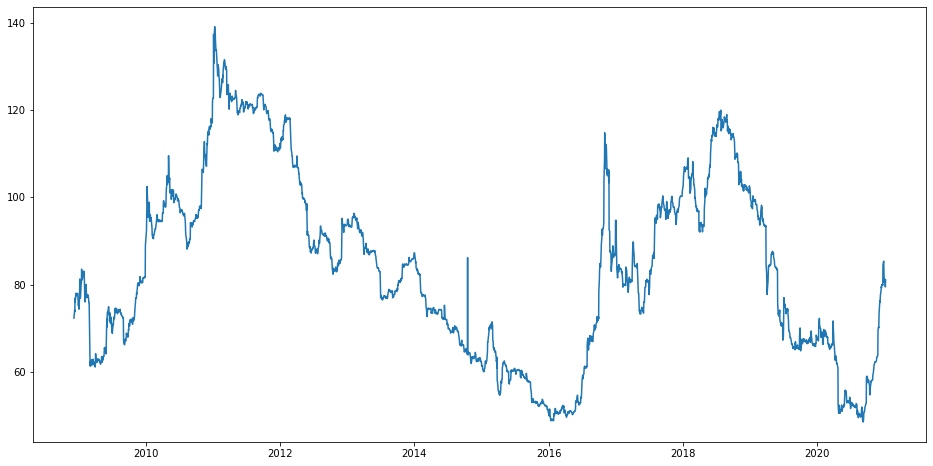

In [95]:
#plot
plt.figure(figsize=(16,8))
plt.plot(df['Settle'], label='Close Price history')

In [81]:
data = df.sort_index(ascending=True, axis=0)


In [82]:
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Settle'])


In [83]:
for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Settle'][i] = data['Settle'][i]

In [84]:
new_data['Date'] = pd.to_datetime(new_data.Date,format='%Y-%m-%d')
new_data.index = new_data['Date']

In [85]:
new_data.rename(columns={'Settle': 'y', 'Date': 'ds'}, inplace=True)


In [86]:
#train and validation
train = new_data[:3050]
valid = new_data[3050:]

In [87]:
#fit the model
model = Prophet(daily_seasonality=True)
model.fit(train)


In [88]:
close_prices = model.make_future_dataframe(periods=len(valid))
forecast = model.predict(close_prices)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2008-12-05,71.016473,62.808830,77.467211,71.016473,71.016473,-1.148741,-1.148741,-1.148741,-2.725099,...,0.681347,0.681347,0.681347,0.895010,0.895010,0.895010,0.0,0.0,0.0,69.867732
1,2008-12-08,71.046977,62.955301,77.903343,71.046977,71.046977,-1.089778,-1.089778,-1.089778,-2.725099,...,0.628996,0.628996,0.628996,1.006325,1.006325,1.006325,0.0,0.0,0.0,69.957199
2,2008-12-09,71.057145,62.462815,77.638164,71.057145,71.057145,-1.066524,-1.066524,-1.066524,-2.725099,...,0.603426,0.603426,0.603426,1.055149,1.055149,1.055149,0.0,0.0,0.0,69.990621
3,2008-12-10,71.067313,62.811138,77.343652,71.067313,71.067313,-1.044036,-1.044036,-1.044036,-2.725099,...,0.571418,0.571418,0.571418,1.109645,1.109645,1.109645,0.0,0.0,0.0,70.023277
4,2008-12-11,71.077481,62.362532,77.694189,71.077481,71.077481,-0.953980,-0.953980,-0.953980,-2.725099,...,0.601290,0.601290,0.601290,1.169829,1.169829,1.169829,0.0,0.0,0.0,70.123501
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3091,2020-12-14,43.467297,35.387039,50.448084,43.442119,43.467297,-0.710208,-0.710208,-0.710208,-2.725099,...,0.628996,0.628996,0.628996,1.385894,1.385894,1.385894,0.0,0.0,0.0,42.757088
3092,2020-12-15,43.390306,35.676529,50.682482,43.358346,43.390306,-0.651113,-0.651113,-0.651113,-2.725099,...,0.603426,0.603426,0.603426,1.470559,1.470559,1.470559,0.0,0.0,0.0,42.739192
3093,2020-12-16,43.313315,35.422268,50.161866,43.272742,43.313315,-0.591615,-0.591615,-0.591615,-2.725099,...,0.571418,0.571418,0.571418,1.562066,1.562066,1.562066,0.0,0.0,0.0,42.721699
3094,2020-12-17,43.236324,35.515950,50.665644,43.194672,43.238758,-0.463053,-0.463053,-0.463053,-2.725099,...,0.601290,0.601290,0.601290,1.660756,1.660756,1.660756,0.0,0.0,0.0,42.773271


In [89]:
#rmse
forecast_valid = forecast['yhat'][3050:]
rms=np.sqrt(np.mean(np.power((np.array(valid['y'])-np.array(forecast_valid)),2)))
rms

29.988889098953585

<ipython-input-90-0102cca35a87>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = 0
<ipython-input-90-0102cca35a87>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = forecast_valid.values


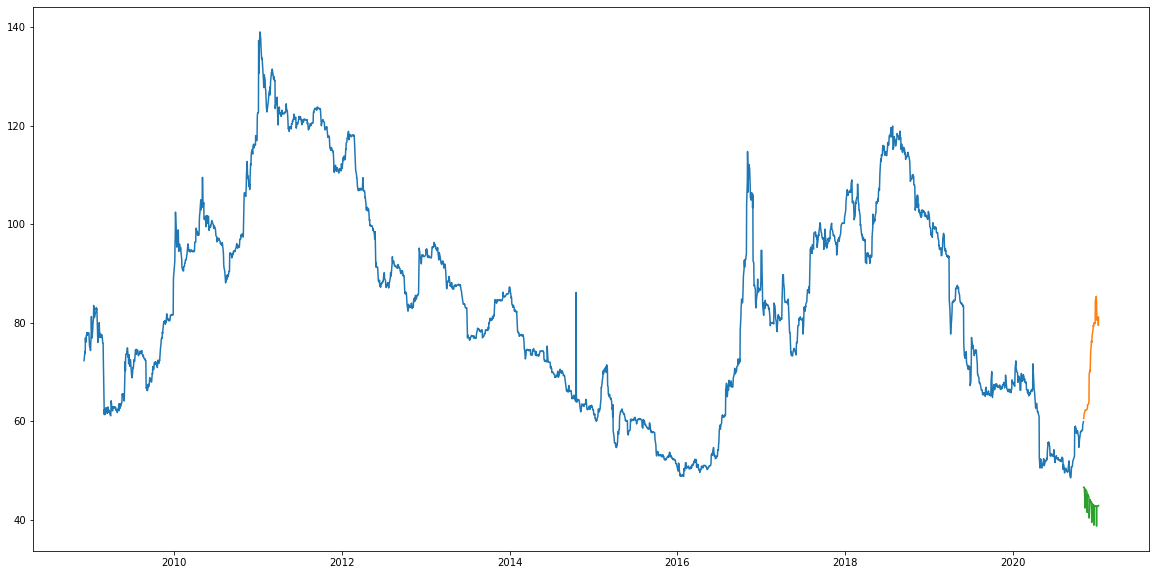

In [90]:
#plot
valid['Predictions'] = 0
valid['Predictions'] = forecast_valid.values

plt.plot(train['y'])
plt.plot(valid[['y', 'Predictions']])